In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
current_path = os.getcwd()
current_path

'C:\\Users\\vaibhav'

In [2]:
os.chdir("D:\\Learning\\NLP_Diaster_tweet_classification")

In [3]:
current_path = os.getcwd()
current_path

'D:\\Learning\\NLP_Diaster_tweet_classification'

In [5]:
train = pd.read_csv(r"./nlp-getting-started/train.csv")

The number targets are 
 0    4342
1    3271
Name: target, dtype: int64


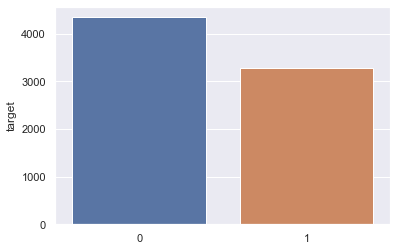

In [291]:
print("The number targets are \n",train.target.value_counts())
sns.barplot(train.target.unique()[::-1],train.target.value_counts())




In [279]:
train.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [33]:
train[train.location =='Pretoria'].target.count()
count_location = train.groupby(["location","target"]).count().reset_index()

In [231]:
import re
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
  

def clean_text(sent):
    text = sent.lower()
    text = re.sub("https*\S+"," ",text)
    text = re.sub(r"[^A-Za-z]"," ",text)
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    text = ' '.join([word for word in text.split() if len(word) > 2])
    return(text)






In [232]:
# cleaning the raw text 
train["clean_text"] = train.text.apply(lambda x : clean_text(x))


In [239]:
all_words = []
for i in train.clean_text:
    for j in i.split():
        if j not in all_words:
            all_words.append(j)
#     all_words.append([j for j in i.split() if j not in all_words])

In [187]:
# Building bag of words model,making a dictionary of words and the number of times it occured in data set
# creating the feature matrix 

from sklearn.feature_extraction.text import CountVectorizer

matrix = CountVectorizer(max_features=4000,ngram_range =(1,2))
X = matrix.fit_transform(train.clean_text).toarray()
Y = train.loc[:,"target"]

In [188]:
# Spliting the data set into train and test

from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(X, Y)

print("x_train shape",x_train.shape)
print("y_train shape",y_train.shape)
print("x_val shape",x_val.shape)
print("y_val shape",y_val.shape)


x_train shape (5709, 4000)
y_train shape (5709,)
x_val shape (1904, 4000)
y_val shape (1904,)


In [189]:
# Model implementiton 
# Naive Bayes 

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

# Predict Class
y_pred = classifier.predict(x_val)

# Accuracy 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

accuracy = accuracy_score(y_val, y_pred)
con_matrix = confusion_matrix(y_val,y_pred)
report = classification_report(y_val,y_pred)


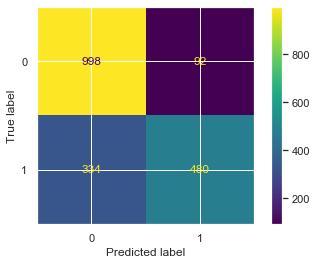

In [190]:
con_matrix
con_matrix_plot = plot_confusion_matrix(classifier,x_val,y_val,values_format = '')
plt.show()


In [191]:
accuracy

0.7762605042016807

In [248]:
# Implemeting TF-IDF vectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(analyzer= 'word',stop_words ="english")
X_tf = tf_idf.fit_transform(train.clean_text).toarray()

In [250]:

from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(X_tf, Y)

print("x_train shape",x_train.shape)
print("y_train shape",y_train.shape)
print("x_val shape",x_val.shape)
print("y_val shape",y_val.shape)


x_train shape (5709, 14348)
y_train shape (5709,)
x_val shape (1904, 14348)
y_val shape (1904,)


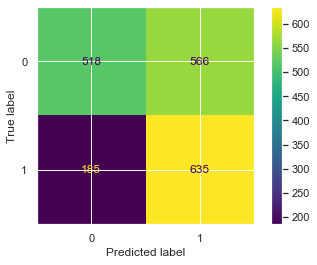

In [293]:
# Model implementiton 
# Naive Bayes 

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

# Predict Class
y_pred = classifier.predict(x_val)

# Accuracy 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

accuracy = accuracy_score(y_val, y_pred)
con_matrix = confusion_matrix(y_val,y_pred)
report = classification_report(y_val,y_pred)

con_matrix
con_matrix_plot = plot_confusion_matrix(classifier,x_val,y_val,values_format = '')
plt.show()

In [294]:

accuracy

0.6055672268907563

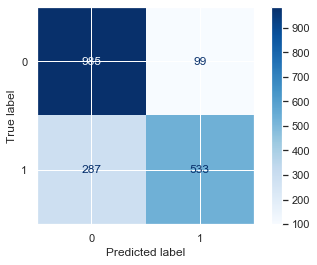

In [262]:
from sklearn.naive_bayes import MultinomialNB
multi_NB = MultinomialNB()
multi_NB.fit(x_train, y_train)


# Predict Class
y_pred = multi_NB.predict(x_val)

accuracy = accuracy_score(y_val, y_pred)
con_matrix = confusion_matrix(y_val,y_pred)
report = classification_report(y_val,y_pred)

con_matrix
con_matrix_plot = plot_confusion_matrix(multi_NB,x_val,y_val,cmap=plt.cm.Blues,values_format = '')
plt.show()

In [263]:
# Accuracy for multinomial with TF-IDF vectorizer
accuracy

0.7972689075630253

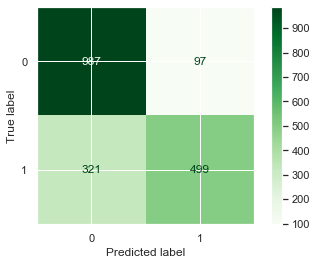

In [259]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)
# from sklearn.metrics import confusion_matrix,accuracy_score

# Predict Class
y_pred = model.predict(x_val)

accuracy = accuracy_score(y_val, y_pred)
con_matrix = confusion_matrix(y_val,y_pred)
report = classification_report(y_val,y_pred)

con_matrix
con_matrix_plot = plot_confusion_matrix(model,x_val,y_val, cmap=plt.cm.Greens,values_format = '')
plt.show()

In [261]:
# Accuracy for RandomForest with TF-IDF Vectorizer
accuracy

0.7804621848739496

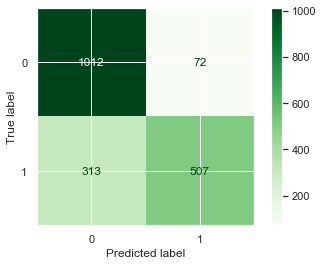

In [264]:
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(x_train, y_train)

# Predict Class
y_pred = lr.predict(x_val)

accuracy = accuracy_score(y_val, y_pred)
con_matrix = confusion_matrix(y_val,y_pred)
report = classification_report(y_val,y_pred)

con_matrix
con_matrix_plot = plot_confusion_matrix(lr,x_val,y_val, cmap=plt.cm.Greens,values_format = '')
plt.show()

In [265]:
# Accuracy for LogisticsRegression with TF-IDF Vectorizer
accuracy

0.7977941176470589